In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data=pd.read_excel('Data Sets/DatasetsPUNE/100mrun.xlsx')
# data.corr()
# data=pd.DataFrame(data,columns=['Year','Time'])
# data=data.drop(0)
# data.columns(['Year','time'])
# data=data.rename(columns={'100 m running':'Year','Unnamed: 1':'time'})
data

,Year,Time(sec)
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1908,10.80
4,1912,10.80
5,1920,10.80
6,1924,10.60
7,1928,10.80
8,1932,10.30
9,1936,10.30


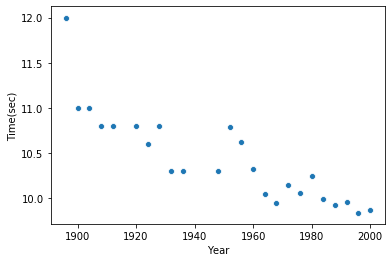

In [4]:
sns.scatterplot(data=data,x='Year',y='Time(sec)')

In [5]:
data.corr()

,Year,Time(sec)
Year,1.000000,-0.865627
Time(sec),-0.865627,1.000000


In [7]:
x=data[['Year']]
y=data['Time(sec)']
lr=LinearRegression()
lr.fit(x,y)
print('intercept=',lr.intercept_)
print('slope=',lr.coef_)

y_pred=lr.predict(x)
print('mse',mean_squared_error(y,y_pred))
print('r2',r2_score(y,y_pred))

intercept= 36.316124150792604
slope= [-0.01327308]
mse 0.061454470716220184
r2 0.7493096720669312


[9.90269802]


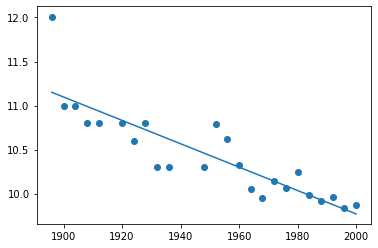

In [8]:
n=lr.intercept_+lr.coef_*1990
print(n)
plt.scatter(x,y)
plt.plot(x,y_pred)

In [9]:
n=lr.intercept_+lr.coef_*2008
n

array([9.6637826])

408.48724015686344
[ 0.00000000e+00 -3.95534148e-01  9.81290540e-05]
0.05407656678963133
0.7794062481704996


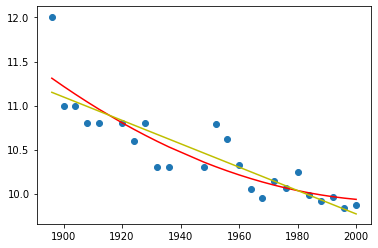

In [15]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(2)
x_poly1=pf.fit_transform(x)
# print(x_poly1)

lr=LinearRegression()
lr.fit(x_poly1,y)

y_pred1=lr.predict(x_poly1)

print(lr.intercept_)
print(lr.coef_)


print(mean_squared_error(y_pred1,y))
print(r2_score(y,y_pred1))
plt.scatter(x,y)
plt.plot(x,y_pred1,color='R')
plt.plot(x,y_pred,color="y")